In [17]:
from mnmf import mnmf
import numpy as np
import scipy.signal as ss
from scipy.io.wavfile import write
import librosa
import IPython.display as ipd
from drawer import plot, RMSE, spectral_difference

In [18]:
part1_org, sr = librosa.load('../data/voice2_original.mp3')
part2_org, sr = librosa.load('../data/voice1_original.mp3')

trim = min(len(part1_org), len(part2_org))

part1_org = part1_org[:trim]
part2_org = part2_org[:trim]

orgs = np.vstack([part1_org, part2_org])

display(ipd.Audio(part1_org, rate = sr))
display(ipd.Audio(part2_org, rate = sr))

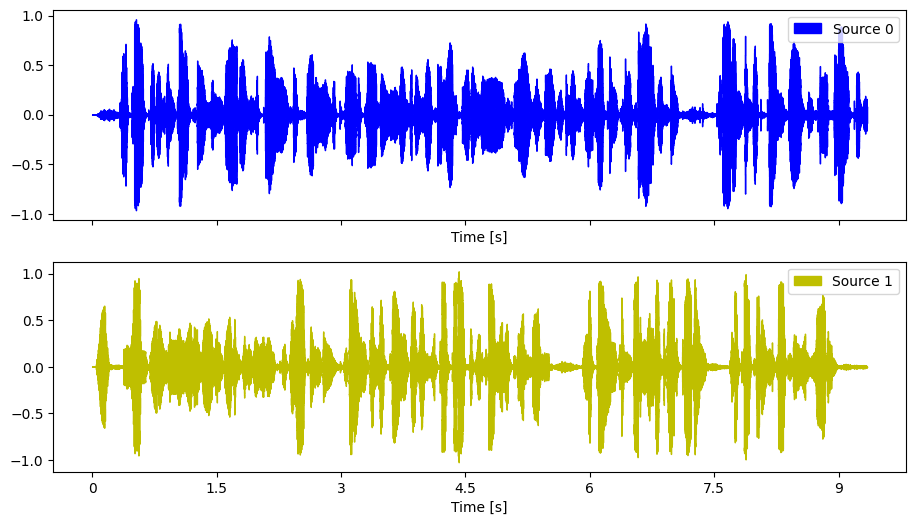

In [19]:
plot(orgs, sr)

In [20]:
part1, sr = librosa.load('../data/voice2.mp3')
part2, sr = librosa.load('../data/voice1.mp3')

NUM_ITER, FFT, HOP = 20, 4096, 2048

x = np.array([part1, part2])

n_channels, T = x.shape
n_sources = n_channels

display(ipd.Audio(part1, rate = sr))
display(ipd.Audio(part2, rate = sr))

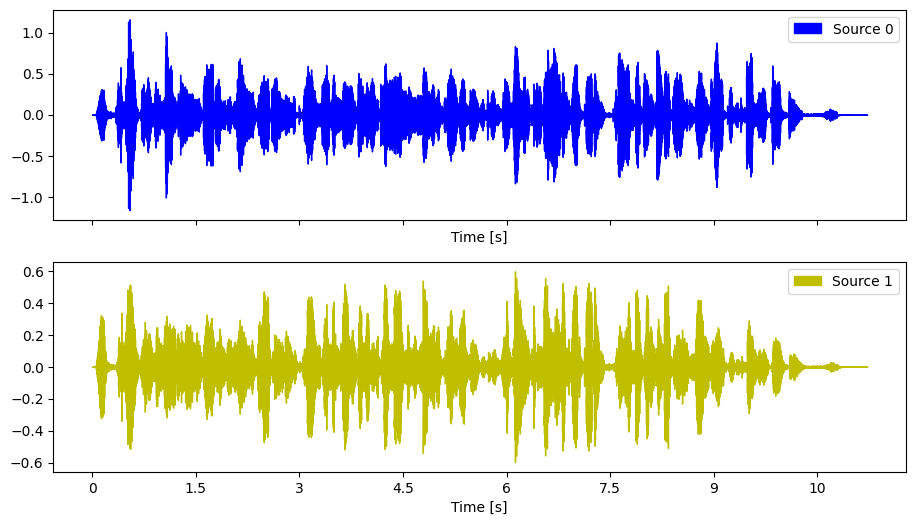

In [21]:
plot(x, sr)

In [22]:
_, _, X = ss.stft(x, nperseg = FFT, noverlap = HOP)
Y = mnmf(X, n_basis = 2, iteration = NUM_ITER)
_, y = ss.istft(Y, nperseg = FFT, noverlap = HOP)
y = y[:, :T]

In [23]:
for i in range(len(x)):
    write(f'../output/unmixed_{i + 1}.wav', rate = sr, data = y[i])

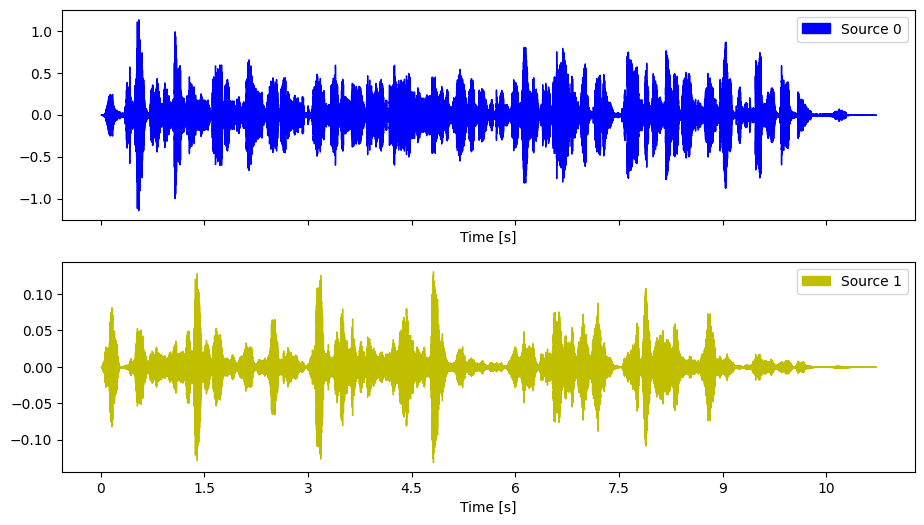

In [24]:
plot(y, sr)

In [25]:
print("Recording - 1")
mse1 = RMSE(part1, part1_org)
print("MSE beetween original and mixed : ", mse1)
mse2 = RMSE(y[0], part1_org)
print("MSE beetween original and separated : ", mse2)

Recording - 1
MSE beetween original and mixed :  0.19054076
MSE beetween original and separated :  0.1864792271911276


In [26]:
spd = spectral_difference(part1_org, y[0])
print("Spectral difference beetween original and separated : ", spd)

Spectral difference beetween original and separated :  0.6321487937904628
